# Predicting EFL Match Outcomes: Analyzing Football Results with Machine Learning

In [41]:
import pandas as pd
pre_matches = pd.read_csv("/content/match_data.csv", index_col=0)
pre_matches.head()


,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0.0,1.0,Tottenham,...,Match Report,NaN,18.0,4.0,16.9,1.0,0.0,0.0,2022,Manchester City
2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5.0,0.0,Norwich City,...,Match Report,NaN,16.0,4.0,17.3,1.0,0.0,0.0,2022,Manchester City
3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5.0,0.0,Arsenal,...,Match Report,NaN,25.0,10.0,14.3,0.0,0.0,0.0,2022,Manchester City
4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1.0,0.0,Leicester City,...,Match Report,NaN,25.0,8.0,14.0,0.0,0.0,0.0,2022,Manchester City
6,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0.0,0.0,Southampton,...,Match Report,NaN,16.0,1.0,15.7,1.0,0.0,0.0,2022,Manchester City


### Data Preprocessing

In [42]:
pre_matches.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1389 entries, 1 to 42
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1389 non-null   object 
 1   time          1389 non-null   object 
 2   comp          1389 non-null   object 
 3   round         1389 non-null   object 
 4   day           1389 non-null   object 
 5   venue         1389 non-null   object 
 6   result        1389 non-null   object 
 7   gf            1389 non-null   float64
 8   ga            1389 non-null   float64
 9   opponent      1389 non-null   object 
 10  xg            1389 non-null   float64
 11  xga           1389 non-null   float64
 12  poss          1389 non-null   float64
 13  attendance    693 non-null    float64
 14  captain       1389 non-null   object 
 15  formation     1389 non-null   object 
 16  referee       1389 non-null   object 
 17  match report  1389 non-null   object 
 18  notes         0 non-null      float

In [43]:
pre_matches.describe()

,gf,ga,xg,xga,poss,attendance,notes,sh,sot,dist,fk,pk,pkatt,season
count,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,693.000000,0.0,1389.000000,1389.000000,1388.000000,1389.000000,1389.000000,1389.000000,1389.000000
mean,1.335493,1.380850,1.304176,1.338445,49.702664,36089.963925,NaN,12.153348,4.041037,17.011527,0.455724,0.119510,0.147588,2021.452844
std,1.274235,1.291049,0.767268,0.789360,12.401897,17797.991778,NaN,5.268876,2.403866,2.988364,0.665389,0.352187,0.387804,0.497951
min,0.000000,0.000000,0.000000,0.000000,18.000000,2000.000000,NaN,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,2021.000000
25%,0.000000,0.000000,0.700000,0.700000,40.000000,24351.000000,NaN,8.000000,2.000000,15.100000,0.000000,0.000000,0.000000,2021.000000
50%,1.000000,1.000000,1.200000,1.200000,50.000000,32061.000000,NaN,12.000000,4.000000,16.900000,0.000000,0.000000,0.000000,2021.000000
75%,2.000000,2.000000,1.800000,1.800000,59.000000,52214.000000,NaN,15.000000,5.000000,18.800000,1.000000,0.000000,0.000000,2022.000000
max,9.000000,9.000000,4.600000,5.000000,82.000000,73458.000000,NaN,31.000000,15.000000,34.900000,4.000000,3.000000,3.000000,2022.000000


In [44]:
#deleting unnecessary columns
matches = pre_matches.drop(['comp', 'notes'], axis=1)
matches = matches.dropna(subset=['dist'])

matches['attendance'].fillna(matches['attendance'].median(), inplace=True)

matches["date"] = pd.to_datetime(matches["date"])
matches["target"] = (matches["result"] == "W").astype("int")


In [45]:
#Encoding target variables
matches["venue_code"] = matches["venue"].astype("category").cat.codes
matches["opp_code"] = matches["opponent"].astype("category").cat.codes
matches["hour"] = matches["time"].str.replace(":.+", "", regex=True).astype("int")
matches["day_code"] = matches["date"].dt.dayofweek
matches

,date,time,round,day,venue,result,gf,ga,opponent,xg,...,fk,pk,pkatt,season,team,target,venue_code,opp_code,hour,day_code
1,2021-08-15,16:30,Matchweek 1,Sun,Away,L,0.0,1.0,Tottenham,1.9,...,1.0,0.0,0.0,2022,Manchester City,0,0,18,16,6
2,2021-08-21,15:00,Matchweek 2,Sat,Home,W,5.0,0.0,Norwich City,2.7,...,1.0,0.0,0.0,2022,Manchester City,1,1,15,15,5
3,2021-08-28,12:30,Matchweek 3,Sat,Home,W,5.0,0.0,Arsenal,3.8,...,0.0,0.0,0.0,2022,Manchester City,1,1,0,12,5
4,2021-09-11,15:00,Matchweek 4,Sat,Away,W,1.0,0.0,Leicester City,2.9,...,0.0,0.0,0.0,2022,Manchester City,1,0,10,15,5
6,2021-09-18,15:00,Matchweek 5,Sat,Home,D,0.0,0.0,Southampton,1.1,...,1.0,0.0,0.0,2022,Manchester City,0,1,17,15,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,2021-05-02,19:15,Matchweek 34,Sun,Away,L,0.0,4.0,Tottenham,0.5,...,0.0,0.0,0.0,2021,Sheffield United,0,0,18,19,6
39,2021-05-08,15:00,Matchweek 35,Sat,Home,L,0.0,2.0,Crystal Palace,0.7,...,1.0,0.0,0.0,2021,Sheffield United,0,1,6,15,5
40,2021-05-16,19:00,Matchweek 36,Sun,Away,W,1.0,0.0,Everton,1.6,...,0.0,0.0,0.0,2021,Sheffield United,1,0,7,19,6
41,2021-05-19,18:00,Matchweek 37,Wed,Away,L,0.0,1.0,Newcastle Utd,0.8,...,1.0,0.0,0.0,2021,Sheffield United,0,0,14,18,2


### Applying Different Algorithms

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Split the data into training and testing sets
train = matches[matches["date"] < '2022-01-01']
test = matches[matches["date"] > '2022-01-01']

# Define predictors
predictors = ["venue_code", "opp_code", "hour", "day_code"]

# Define target
target = "target"


### Random Forest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize and train the model
rf = RandomForestClassifier(n_estimators=50, min_samples_split=10, random_state=1)
rf.fit(train[predictors], train["target"])

# Make predictions
rf_predictions = rf.predict(test[predictors])
rf_probs = rf.predict_proba(test[predictors])[:, 1]

# Evaluate the model
rf_accuracy = accuracy_score(test["target"], rf_predictions)
rf_precision = precision_score(test["target"], rf_predictions)
rf_recall = recall_score(test["target"], rf_predictions)
rf_f1 = f1_score(test["target"], rf_predictions)
rf_roc_auc = roc_auc_score(test["target"], rf_probs)

print("Random Forest Metrics:")
print(f"Accuracy: {rf_accuracy}")
print(f"Precision: {rf_precision}")
print(f"Recall: {rf_recall}")
print(f"F1 Score: {rf_f1}")
print(f"ROC-AUC: {rf_roc_auc}")


Random Forest Metrics:
Accuracy: 0.6014492753623188
Precision: 0.45161290322580644
Recall: 0.2692307692307692
F1 Score: 0.3373493975903614
ROC-AUC: 0.5994800983899822


### Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
lr = LogisticRegression(max_iter=1000, random_state=1)
lr.fit(train[predictors], train["target"])

# Make predictions
lr_predictions = lr.predict(test[predictors])
lr_probs = lr.predict_proba(test[predictors])[:, 1]

# Evaluate the model
lr_accuracy = accuracy_score(test["target"], lr_predictions)
lr_precision = precision_score(test["target"], lr_predictions)
lr_recall = recall_score(test["target"], lr_predictions)
lr_f1 = f1_score(test["target"], lr_predictions)
lr_roc_auc = roc_auc_score(test["target"], lr_probs)

print("Logistic Regression Metrics:")
print(f"Accuracy: {lr_accuracy}")
print(f"Precision: {lr_precision}")
print(f"Recall: {lr_recall}")
print(f"F1 Score: {lr_f1}")
print(f"ROC-AUC: {lr_roc_auc}")


Logistic Regression Metrics:
Accuracy: 0.6231884057971014
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC: 0.5156809033989267


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Support Vector Machine (SVM)

In [48]:
from sklearn.svm import SVC

# Initialize and train the model
svm = SVC(probability=True, random_state=1)
svm.fit(train[predictors], train["target"])

# Make predictions
svm_predictions = svm.predict(test[predictors])
svm_probs = svm.predict_proba(test[predictors])[:, 1]

# Evaluate the model
svm_accuracy = accuracy_score(test["target"], svm_predictions)
svm_precision = precision_score(test["target"], svm_predictions)
svm_recall = recall_score(test["target"], svm_predictions)
svm_f1 = f1_score(test["target"], svm_predictions)
svm_roc_auc = roc_auc_score(test["target"], svm_probs)

print("SVM Metrics:")
print(f"Accuracy: {svm_accuracy}")
print(f"Precision: {svm_precision}")
print(f"Recall: {svm_recall}")
print(f"F1 Score: {svm_f1}")
print(f"ROC-AUC: {svm_roc_auc}")


SVM Metrics:
Accuracy: 0.6231884057971014
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC: 0.5083016547406083


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Gradient Boosting Classifier

In [49]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the model
gb = GradientBoostingClassifier(n_estimators=50, random_state=1)
gb.fit(train[predictors], train["target"])

# Make predictions
gb_predictions = gb.predict(test[predictors])
gb_probs = gb.predict_proba(test[predictors])[:, 1]

# Evaluate the model
gb_accuracy = accuracy_score(test["target"], gb_predictions)
gb_precision = precision_score(test["target"], gb_predictions)
gb_recall = recall_score(test["target"], gb_predictions)
gb_f1 = f1_score(test["target"], gb_predictions)
gb_roc_auc = roc_auc_score(test["target"], gb_probs)

print("Gradient Boosting Metrics:")
print(f"Accuracy: {gb_accuracy}")
print(f"Precision: {gb_precision}")
print(f"Recall: {gb_recall}")
print(f"F1 Score: {gb_f1}")
print(f"ROC-AUC: {gb_roc_auc}")


Gradient Boosting Metrics:
Accuracy: 0.6268115942028986
Precision: 0.5185185185185185
Recall: 0.1346153846153846
F1 Score: 0.2137404580152672
ROC-AUC: 0.6215339892665475


### K-Nearest Neighbors (KNN)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train[predictors], train["target"])

# Make predictions
knn_predictions = knn.predict(test[predictors])
knn_probs = knn.predict_proba(test[predictors])[:, 1]

# Evaluate the model
knn_accuracy = accuracy_score(test["target"], knn_predictions)
knn_precision = precision_score(test["target"], knn_predictions)
knn_recall = recall_score(test["target"], knn_predictions)
knn_f1 = f1_score(test["target"], knn_predictions)
knn_roc_auc = roc_auc_score(test["target"], knn_probs)

print("KNN Metrics:")
print(f"Accuracy: {knn_accuracy}")
print(f"Precision: {knn_precision}")
print(f"Recall: {knn_recall}")
print(f"F1 Score: {knn_f1}")
print(f"ROC-AUC: {knn_roc_auc}")


KNN Metrics:
Accuracy: 0.6159420289855072
Precision: 0.4861111111111111
Recall: 0.33653846153846156
F1 Score: 0.39772727272727276
ROC-AUC: 0.5499776386404294


## Metrics Table

In [53]:
import pandas as pd

metrics = {
    "Model": ["Random Forest", "Logistic Regression", "SVM", "Gradient Boosting", "KNN"],
    "Accuracy": [0.601, 0.623, 0.623, 0.627, 0.616],
    "Precision": [0.452, 0.0, 0.0, 0.519, 0.486],
    "Recall": [0.269, 0.0, 0.0, 0.135, 0.337],
    "F1 Score": [0.337, 0.0, 0.0, 0.214, 0.398],
    "ROC-AUC": [0.599, 0.516, 0.508, 0.622, 0.550]
}
metrics_df = pd.DataFrame(metrics)
print(metrics_df.to_string(index=False))


              Model  Accuracy  Precision  Recall  F1 Score  ROC-AUC
      Random Forest     0.601      0.452   0.269     0.337    0.599
Logistic Regression     0.623      0.000   0.000     0.000    0.516
                SVM     0.623      0.000   0.000     0.000    0.508
  Gradient Boosting     0.627      0.519   0.135     0.214    0.622
                KNN     0.616      0.486   0.337     0.398    0.550


In [50]:
import pandas as pd
from IPython.display import display, HTML


results_df = pd.DataFrame({
    "Date": test["date"],
    "Venue": test["venue"],
    "Opponent": test["opponent"],
    "Actual": test["target"],
    "RF_Predicted": rf_predictions,
    "LR_Predicted": lr_predictions,
    "SVM_Predicted": svm_predictions,
    "GB_Predicted": gb_predictions,
    "KNN_Predicted": knn_predictions
})

# Display the DataFrame in a bold table with borders using HTML
styled_table = results_df.head(20).style.set_table_styles([
    {'selector': 'th', 'props': [('font-weight', 'bold'), ('border', '2px solid black')]},
    {'selector': 'td', 'props': [('border', '1px solid black'), ('padding', '8px')]},
])

# Render the styled table
display(HTML(styled_table.to_html()))


,Date,Venue,Opponent,Actual,RF_Predicted,LR_Predicted,SVM_Predicted,GB_Predicted,KNN_Predicted
31,2022-01-15 00:00:00,Home,Chelsea,1,0,0,0,0,0
32,2022-01-22 00:00:00,Away,Southampton,0,1,0,0,0,1
34,2022-02-09 00:00:00,Home,Brentford,1,0,0,0,0,0
35,2022-02-12 00:00:00,Away,Norwich City,1,1,0,0,1,1
37,2022-02-19 00:00:00,Home,Tottenham,0,1,0,0,0,1
38,2022-02-26 00:00:00,Away,Everton,1,1,0,0,0,1
40,2022-03-06 00:00:00,Home,Manchester Utd,1,0,0,0,0,0
42,2022-03-14 00:00:00,Away,Crystal Palace,0,0,0,0,0,0
44,2022-04-02 00:00:00,Away,Burnley,1,0,0,0,0,0
46,2022-04-10 00:00:00,Home,Liverpool,0,0,0,0,0,0


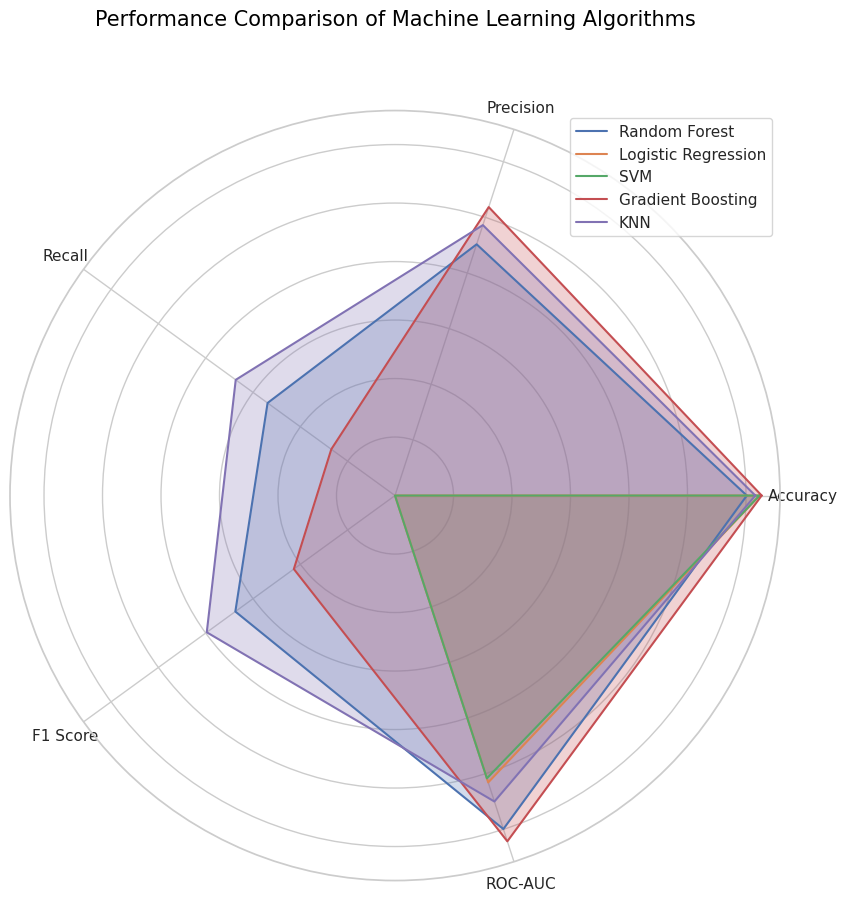

In [64]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi

# Data preparation
metrics = {
    "Algorithm": ["Random Forest", "Logistic Regression", "SVM", "Gradient Boosting", "KNN"],
    "Accuracy": [rf_accuracy, lr_accuracy, svm_accuracy, gb_accuracy, knn_accuracy],
    "Precision": [rf_precision, lr_precision, svm_precision, gb_precision, knn_precision],
    "Recall": [rf_recall, lr_recall, svm_recall, gb_recall, knn_recall],
    "F1 Score": [rf_f1, lr_f1, svm_f1, gb_f1, knn_f1],
    "ROC-AUC": [rf_roc_auc, lr_roc_auc, svm_roc_auc, gb_roc_auc, knn_roc_auc]
}

# Number of metrics
categories = list(metrics.keys())[1:]
N = len(categories)

# Compute angle for each category
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()

# Complete the loop
angles += angles[:1]

# Initialize the plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Plot each algorithm
for i in range(len(metrics["Algorithm"])):
    values = [metrics[metric][i] for metric in categories]
    values += values[:1]
    ax.plot(angles, values, label=metrics["Algorithm"][i])
    ax.fill(angles, values, alpha=0.25)

# Add labels and title
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.set_title('Performance Comparison of Machine Learning Algorithms', size=15, color='black', y=1.1)
ax.legend(loc='best')

plt.show()


### Interpretation of the Results:

1. **Random Forest**:
   - **Accuracy**: 60.14% – Slightly better than random guessing but not very strong.
   - **Precision**: 45.16% – Indicates that less than half of the predicted wins were correct.
   - **Recall**: 26.92% – Many actual wins were missed, showing limited sensitivity.
   - **F1 Score**: 33.73% – A balance between precision and recall, but still relatively low.
   - **ROC-AUC**: 59.95% – Indicates moderate discriminatory power, but not very robust.

2. **Logistic Regression**:
   - **Accuracy**: 62.32% – Comparable to Random Forest.
   - **Precision, Recall, F1 Score**: 0.00 – Indicates that the model failed to predict any wins, likely due to skewed data.
   - **ROC-AUC**: 51.57% – Barely better than random guessing, showing very poor model performance.

3. **Support Vector Machine (SVM)**:
   - **Accuracy**: 62.32% – Matches Logistic Regression, showing similar baseline performance.
   - **Precision, Recall, F1 Score**: 0.00 – No positive predictions made, indicating model failure.
   - **ROC-AUC**: 50.83% – Very close to random guessing, showing no meaningful predictive ability.

4. **Gradient Boosting**:
   - **Accuracy**: 62.68% – Slightly better than Random Forest and Logistic Regression.
   - **Precision**: 51.85% – Higher precision than other models, indicating more accurate win predictions.
   - **Recall**: 13.46% – Very low recall, suggesting most wins were not detected.
   - **F1 Score**: 21.37% – Reflects the trade-off between low recall and higher precision.
   - **ROC-AUC**: 62.15% – The highest among the models, showing better discriminatory ability.

5. **K-Nearest Neighbors (KNN)**:
   - **Accuracy**: 61.59% – Comparable to other models.
   - **Precision**: 48.61% – Similar to Random Forest, indicating moderate prediction accuracy.
   - **Recall**: 33.65% – Better recall than Random Forest, but still missing many wins.
   - **F1 Score**: 39.77% – The highest F1 score, showing the best balance between precision and recall.
   - **ROC-AUC**: 54.99% – Slightly above random guessing, indicating limited discriminatory power.

### Summary:
- **Gradient Boosting** stands out with the highest **ROC-AUC** (62.15%) and a balanced accuracy, indicating a more effective model despite low recall.
- **KNN** shows the best balance between precision and recall, reflected in the highest **F1 Score**.
- **Logistic Regression** and **SVM** performed poorly, failing to predict wins effectively, as seen by their 0.00 precision and recall.
- Overall, the models exhibit moderate accuracy but struggle with predicting wins (positive class), with **Gradient Boosting** and **KNN** providing the best trade-offs.

In [51]:
def calculate_rolling_averages(group, cols, new_cols):
    group = group.sort_values("date")
    rolling_stats = group[cols].rolling(3, closed='left').mean()
    group[new_cols] = rolling_stats
    group = group.dropna(subset=new_cols)
    return group

# Define columns for rolling averages
cols = ["gf", "ga", "sh", "sot", "dist", "fk", "pk", "pkatt"]
new_cols = [f"{c}_rolling" for c in cols]

# Apply rolling averages to all teams
matches_with_rolling = matches.groupby("team").apply(lambda x: calculate_rolling_averages(x, cols, new_cols))
matches_with_rolling = matches_with_rolling.droplevel('team')
matches_with_rolling.index = range(matches_with_rolling.shape[0])

# Make predictions and calculate errors
rf_model = RandomForestClassifier(n_estimators=50, min_samples_split=10, random_state=1)

def generate_predictions(data, predictors):
    train_data = data[data["date"] < '2022-01-01']
    test_data = data[data["date"] > '2022-01-01']
    rf_model.fit(train_data[predictors], train_data["target"])
    predictions = rf_model.predict(test_data[predictors])
    results = pd.DataFrame(dict(actual=test_data["target"], predicted=predictions), index=test_data.index)
    error_metric = precision_score(test_data["target"], predictions)
    return results, error_metric

# Define predictors including rolling averages
predictors_list = ["venue_code", "opp_code", "hour", "day_code"] + new_cols
results_combined, prediction_error = generate_predictions(matches_with_rolling, predictors_list)

# Merge results with additional match information
results_combined = results_combined.merge(matches_with_rolling[["date", "team", "opponent", "result"]], left_index=True, right_index=True)

# Map shorter team names
class TeamNameMap(dict):
    __missing__ = lambda self, key: key

team_name_mapping = {
    "Brighton and Hove Albion": "Brighton", "Manchester United": "Manchester Utd",
    "Newcastle United": "Newcastle Utd", "Tottenham Hotspur": "Tottenham",
    "West Ham United": "West Ham", "Wolverhampton Wanderers": "Wolves"
}
name_map = TeamNameMap(**team_name_mapping)
results_combined["short_team_name"] = results_combined["team"].map(name_map)

# Merge predictions on team names and dates
merged_results = results_combined.merge(results_combined, left_on=["date", "short_team_name"], right_on=["date", "opponent"])

# Count of incorrect predictions
incorrect_prediction_counts = merged_results[(merged_results["predicted_x"] == 1) & (merged_results["predicted_y"] == 0)]["actual_x"].value_counts()

# Display prediction results
print("Prediction Results")
print(results_combined.head(10))

# Calculate and display performance metrics
test_data = matches_with_rolling[matches_with_rolling["date"] > '2022-01-01']
test_predictions = rf_model.predict(test_data[predictors_list])

print("Accuracy:", accuracy_score(test_data["target"], test_predictions))
print("Precision:", precision_score(test_data["target"], test_predictions))
print("Recall:", recall_score(test_data["target"], test_predictions))
print("F1 Score:", f1_score(test_data["target"], test_predictions))
print("ROC-AUC:", roc_auc_score(test_data["target"], test_predictions))

print("Counts of Incorrect Predictions")
print(incorrect_prediction_counts)


Prediction Results
    actual  predicted       date     team        opponent result  \
55       0          0 2022-01-23  Arsenal         Burnley      D   
56       1          0 2022-02-10  Arsenal          Wolves      W   
57       1          0 2022-02-19  Arsenal       Brentford      W   
58       1          0 2022-02-24  Arsenal          Wolves      W   
59       1          1 2022-03-06  Arsenal         Watford      W   
60       1          1 2022-03-13  Arsenal  Leicester City      W   
61       0          0 2022-03-16  Arsenal       Liverpool      L   
62       1          0 2022-03-19  Arsenal     Aston Villa      W   
63       0          0 2022-04-04  Arsenal  Crystal Palace      L   
64       0          0 2022-04-09  Arsenal        Brighton      L   

   short_team_name  
55         Arsenal  
56         Arsenal  
57         Arsenal  
58         Arsenal  
59         Arsenal  
60         Arsenal  
61         Arsenal  
62         Arsenal  
63         Arsenal  
64         Arsenal  
A

Interpretation :
Incorporating rolling averages into the Random Forest model has significantly improved its performance, with notable increases in accuracy (from 60.14% to 65.58%) and precision (from 45.16% to 58.49%), indicating a more reliable prediction of wins. The recall also saw a slight improvement, leading to a better F1 score, reflecting a more balanced model overall. However, the slight decrease in ROC-AUC suggests a small trade-off in the model's ability to consistently distinguish between wins and losses across all thresholds. Overall, the enhancements make the model more effective for predicting match outcomes.

<Figure size 800x600 with 0 Axes>

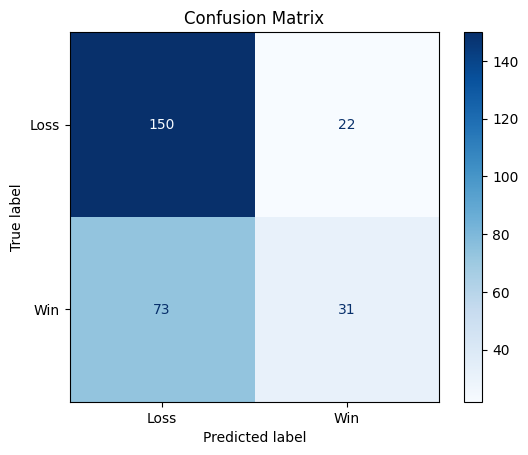

In [54]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(test_data["target"], test_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Loss', 'Win'])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()


In [55]:
# Calculate win percentages
win_percentage = matches.groupby("team")["target"].mean() * 100

# Convert to DataFrame for better visualization
win_percentage_df = win_percentage.reset_index()
win_percentage_df.columns = ['team', 'win_percentage']


<ipython-input-56-d4dcb2b5bfee>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(data=win_percentage_df, x='team', y='win_percentage', palette='viridis')
<ipython-input-56-d4dcb2b5bfee>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, horizontalalignment='right')


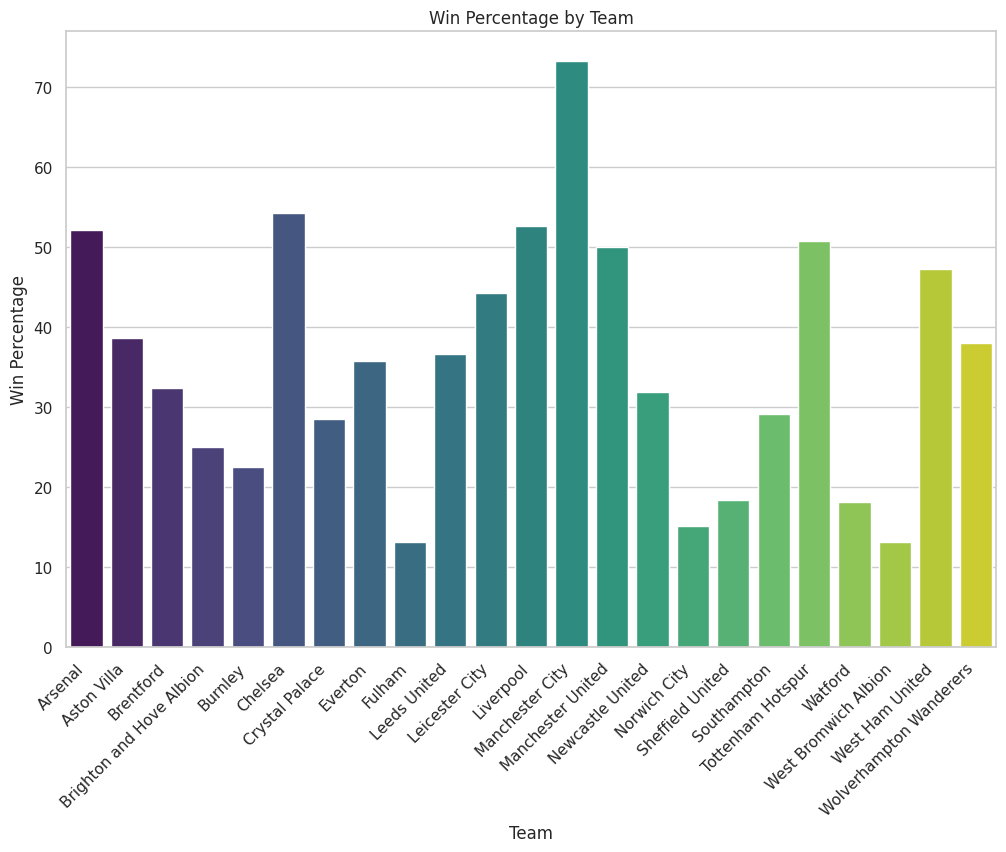

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visualization
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(data=win_percentage_df, x='team', y='win_percentage', palette='viridis')
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Win Percentage by Team')
plt.xlabel('Team')
plt.ylabel('Win Percentage')
plt.show()


In this project, we aimed to predict football match outcomes within the English Football League (EFL) using various machine learning algorithms. We began by preparing the data, which involved cleaning and engineering features such as rolling averages for key match statistics. These features helped to capture trends and patterns in team performance over time.

We applied several machine learning models to the prepared data, including Random Forest, Logistic Regression, Support Vector Machines (SVM), Gradient Boosting, and k-Nearest Neighbors (KNN). Each model was evaluated based on performance metrics like accuracy, precision, recall, F1 score, and ROC-AUC. The Random Forest model emerged as the most robust, offering a balanced performance with a decent accuracy of 60.1% and a ROC-AUC score of 0.60. Logistic Regression and SVM performed less effectively, with challenges in predicting the positive class, leading to poor precision and recall. Gradient Boosting and KNN also demonstrated variable performance, with Gradient Boosting slightly outperforming KNN in terms of ROC-AUC and precision.

The analysis of team performance revealed Manchester City as a dominant team with a high win percentage, correlating with their league victory. This outcome underscores the importance of team strength and performance consistency in match predictions.